In [2]:
%matplotlib inline
import numpy as np
import scipy as sp
import scipy.stats
import matplotlib.pyplot as plt
import matplotlib.lines as lin
import traceback

from ipywidgets import widgets
from ipywidgets.widgets import *
from IPython.display import display

In [17]:
def sigmoid(x):
    #return 1 / (1 + np.exp(-x)) * 2 - 1
    return 1 / (1 + np.exp(-x))

In [123]:
def describe(a):
    return "%s, %s, %s" % (type(a), a.shape, a)

In [251]:
nn_debug = False

def xor_nn(XOR, THETA1, THETA2, it, init_w=0, learn=0, alpha=0.01):
    """ function to calculate and learn XOR solution """
    # first see if this is an initialze run
    if (init_w == 1):
        THETA1 = 2*np.random.random((2,3)) - 1;
        THETA2 = 2*np.random.random((1,3)) - 1;

    # accumulators for the partial derivatives
    T1_DELTA = np.zeros(THETA1.shape);
    T2_DELTA = np.zeros(THETA2.shape);

    # run through the training set
    m = 0;

    # cost function value
    J = 0.0;
    
    h_ret = np.zeros((XOR.shape[0], THETA2.shape[0]))

    #disp('NN output ');

    for i in range(XOR.shape[0]):
        # do the forward propagation
        s1 = np.concatenate([np.array([[1]]), XOR[i,0:2].T], 0);

        Z2 = THETA1 * s1;

        s2 = np.concatenate([np.array([[1]]), sigmoid(Z2)], 0);

        Z3 = THETA2 * s2;

        h = sigmoid(Z3);

        J = J + ( XOR[i,2] * np.log(h) ) + ( (1 - XOR[i,2]) * np.log(1 - h) );
        #J += ( XOR[i,2] - np.log(h) ) ** 2

        m = m + 1;

        h_ret[i,:] = h
        # now update the deltas if we have to learn from this case
        if (learn == 1):
            s1 = np.array(s1)
            s2 = np.array(s2)
            h = np.array(h)
            delta3 = np.array(h - XOR[i,2]);
            #print('THETA2', describe(THETA2.T), describe(delta3), describe(s2))
            #print('s2 * (1 - s2)', describe(s2 * (1 - s2)))
            temp = (THETA2.T * delta3) * (s2 * (1 - s2)) * h * (1 - h);
            delta2 = temp[1:];
            #print('delta2', describe(delta2))
            #print('temp', describe(temp))

            # is no L1 delta

            # add the deltas for this training example to the accumulators
            T2_DELTA = T2_DELTA + (delta3 * s2.T) * (1 - h) * h
            T1_DELTA = T1_DELTA + (delta2 * s1.T);
            if nn_debug and it < 10:
                print('T2_DELTA', describe(T2_DELTA), 'T2', describe(T2_DELTA))
        elif nn_debug:
            print('Hypothesis for ', XOR[i,0:2], 'is ', h);

    J = J / -m;

    if (learn==1):
        THETA1 = THETA1 - (alpha * (T1_DELTA / m));
        THETA2 = THETA2 - (alpha * (T2_DELTA / m));
    else:
        print('J: ', J);

    return THETA1, THETA2, J, h_ret


In [249]:
def plotArrayHist(w,title='',ylabel=''):
    if len(w) == 0:
        return
    plt.plot(np.reshape(w, [len(w),w[0].shape[0]*w[0].shape[1]], 'F'))
    plt.title(title)
    plt.xlabel('Iteration')
    plt.ylabel(ylabel)
    nums = [];
    for i in range(w[0].shape[0]):
        for j in range(w[0].shape[1]):
            nums.append(ylabel + ' ' + str(i) + ',' + str(j))

    plt.legend(nums)

def plotWeightHist(w,layer=0):
    if layer == 0:
        title = 'Weights trend over iteration'
    else:
        title = 'Layer %d weights trend over iteration' % layer
    plotArrayHist(w, title, 'Weight')

In [236]:
[THETA1, THETA2, J, h] = xor_nn(XOR, THETA1, THETA2, 0, 1, 1, 0.01);
h

T2_DELTA <class 'numpy.ndarray'>, (1, 3), [[ 0.14020082  0.06188369  0.05618978]] T2 <class 'numpy.ndarray'>, (1, 3), [[ 0.14020082  0.06188369  0.05618978]]
T2_DELTA <class 'numpy.ndarray'>, (1, 3), [[ 0.02372758  0.02923956  0.01042835]] T2 <class 'numpy.ndarray'>, (1, 3), [[ 0.02372758  0.02923956  0.01042835]]
T2_DELTA <class 'numpy.ndarray'>, (1, 3), [[-0.07952942 -0.01794824 -0.0310397 ]] T2 <class 'numpy.ndarray'>, (1, 3), [[-0.07952942 -0.01794824 -0.0310397 ]]
T2_DELTA <class 'numpy.ndarray'>, (1, 3), [[ 0.05367159  0.02110177  0.02140239]] T2 <class 'numpy.ndarray'>, (1, 3), [[ 0.05367159  0.02110177  0.02140239]]


array([[ 0.57302691],
       [ 0.53217036],
       [ 0.57695159],
       [ 0.53550416]])

In [252]:
XOR = np.matrix([[0,0,0], [0,1,1], [1,0,1], [1,1,0]]);

# Whether to use one-by-one training or minibatch (size 4) training
online_train = False;

THETA1 = 0;
THETA2 = 0;

THETA1_hist = [];
THETA2_hist = [];
J_hist = [];
h_hist = []

[THETA1, THETA2, J, _] = xor_nn(XOR, THETA1, THETA2, it=0, init_w=1, learn=1, alpha=0.01);

# Plot initial randomized weights
#plotnodes({THETA1,THETA2});

J_hist.append(J[0,0]);

for i in range(100000):
    if online_train:
        for j in range(XOR.shape[1]):
            [THETA1, THETA2, J, h] = xor_nn(XOR[j,:], THETA1, THETA2, it=i, init_w=0, learn=1, alpha=0.5);
            J_hist.append(J[0,0]);
            h_hist.append(h)
    else:
        [THETA1, THETA2, J, h] = xor_nn(XOR, THETA1, THETA2, it=i, init_w=0, learn=1, alpha=0.5);
        J_hist.append(J[0,0]);
        h_hist.append(h)

    if i % 1000 == 0:
        print('Iteration : ', i)
        [_, _, J, h] = xor_nn(XOR, THETA1, THETA2, it=i);
        J_hist.append(J[0,0]);
        h_hist.append(h)
        if J < 0.1:
            break

    if i % 1 == 0:
        THETA1_hist.append(THETA1);
        THETA2_hist.append(THETA2);


Iteration :  0
J:  [[ 0.77897645]]
Iteration :  1000
J:  [[ 0.64963379]]
Iteration :  2000
J:  [[ 0.52891723]]
Iteration :  3000
J:  [[ 0.31112878]]
Iteration :  4000
J:  [[ 0.14014907]]
Iteration :  5000
J:  [[ 0.09362859]]


In [247]:
def plotnodes(wl,sl=None):
    """
    wl: a list of weight matrix for each layer of neural network.
    """
    fig, ax = plt.subplots()
    l1 = lin.Line2D([-1,-1],[1,1], transform=fig.transFigure, figure=fig, color='r', linewidth=5)
    fig.lines.extend([l1])
    fig.canvas.draw()
    if sl is not None:
        smax = max(1., np.max([np.max(np.abs(x)) for x in sl]))
        if len(sl) < len(wl)+1:
            raise Exception('sl must have a length of len(wl)+1')
    for n in range(len(wl)):
        w = wl[n]
        if sl is not None:
            if len(sl[n]) < np.shape(w)[1]:
                c1 = np.concatenate((sl[n],[-1]),0) / smax
            else:
                c1 = sl[n] / smax
            if len(sl[n+1]) < np.shape(w)[1]:
                c2 = sl[n+1] / smax
            else:
                c2 = sl[n+1][:-1] / smax
        else:
            c1 = 0.5*np.ones(np.shape(w)[1])
            c2 = 0.5*np.ones(np.shape(w)[0])
        ax.scatter(n+np.zeros(np.shape(w)[1]), range(np.shape(w)[1]), 100, c=c1, cmap='gray', edgecolor='black')
        ax.scatter(n+np.ones(np.shape(w)[0]), range(np.shape(w)[0]), 100, c=c2, cmap='gray', edgecolor='black')
        for i in range(len(w)):
            start = w[i]
            for j in range(len(start)):
                ax.plot([n,n+1],[j,i+1 if n != len(wl)-1 else i], linewidth=min(10,abs(start[j])), color='k' if 0 < start[j] else 'r')
    ax.set_ylim(np.max([np.shape(x)[1] for x in wl]),-1)

(2, 3)


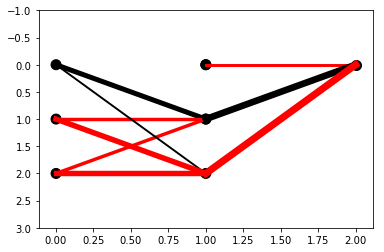

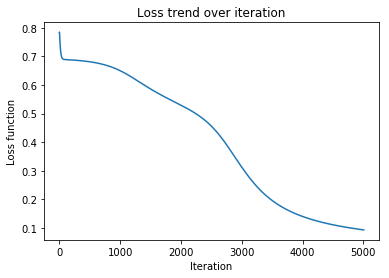

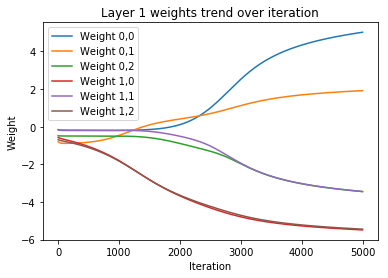

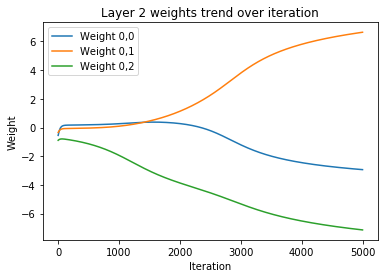

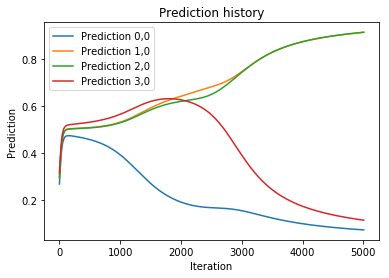

In [253]:

# Plot final trained weights
plotnodes([THETA1,THETA2]);
print(THETA1_hist[0].shape)
# Plot loss function over iterations
plt.figure()
plt.plot(J_hist);
plt.title('Loss trend over iteration')
plt.xlabel('Iteration')
plt.ylabel('Loss function')

plt.figure()
plotWeightHist(THETA1_hist, 1);

plt.figure()
plotWeightHist(THETA2_hist, 2);

plt.figure()
plotArrayHist(h_hist, 'Prediction history', 'Prediction');
